Wrapper Method








The main idea behind a wrapper method is to select which set of features works best for a machine learning model.
It follows a greedy search approach by evaluating all the possible combinations of features against the evaluation criterion.
The evaluation criterion is simply the performance measure which depends on the type of problem, for e.g. For regression evaluation criterion can be MSE,MAE,MAPE,R-squared, Adjusted R-squared, similarly for classification the evaluation criterion can be accuracy, precision, recall, f1-score, etc. It selects the combination of features that gives the optimal results for the specified machine learning algorithm.

1. **Forward Feature Selection**


1.   Forward selection is an iterative method in each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.
2.   In forward selection, we start with a null model and then start fitting the model with each individual feature one at a time and select the feature with the higest arruracy for classification and less MSE/MAPE/MAE for regression models.

3. Now fit a model with two features by trying combinations of the earlier selected feature with all other remaining features. Again select the feature with the higest arruracy for classificartion and less MSE/MAPE/MAE for regression models.

4. Now fit a model with three features by trying combinations of two previously selected features with other remaining features. Repeat this process until we have a set of selected features with a higest arruracy for classificartion and minimum MSE/MAPE/MAE for regression models of individual features.

5. This is an iterative method wherein we start with the best performing variable against the target. Next, we select another variable that gives the best performance in combination with the first selected variable. This process continues until the preset criterion is achieved.

6. Forward selection starts with zero features, then, for each individual feature, runs a model and determines the p-value associated with the t-test or F-test performed. It then selects the feature with the lowest p-value and adds that to the working model. Next, it takes the first feature selected and runs models with a second feature added and selects the second feature with the lowest p-value. Then it takes the two features previously selected and runs models with a third feature and so on, until all features that have significant p-values are added to the model. Any features that never had a significant p-value when tried in the iterations will be excluded from the final model.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load the dataset #https://www.kaggle.com/burak3ergun/loan-data-set
df_loan = pd.read_csv("https://raw.githubusercontent.com/atulpatelDS/Data_Files/master/Loan_Dataset/loan_data_set.csv")

In [3]:
df_loan.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [6]:
df_loan.shape

(614, 13)

In [4]:
df_loan.info()


# As we can see there is null values and having categorical values too
# Not doing any feature engineering here, as dropping these null values and for categorical features will apply label encoder

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
# Remove all null value
df_loan.dropna(inplace=True)
# drop the uninformatica column("Loan_ID")
df_loan.drop(labels=["Loan_ID"],axis=1,inplace=True)
df_loan.reset_index(drop=True,inplace=True)

In [9]:
# laber enconding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Coverting column names into list
cols = df_loan.columns.tolist()
for column in cols:
    if df_loan[column].dtype == 'object':
        df_loan[column] = le.fit_transform(df_loan[column])

In [10]:
# seperating dependent and independent variables

X = df_loan.iloc[:,0:-1]
y = df_loan["Loan_Status"]

In [11]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
4,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2


In [12]:
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

# Printing the shape and type

(480, 11)
(480,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [17]:
!pip install mlxtend

# for installing packages

In [21]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

In [22]:
# library for forward feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.ensemble import RandomForestClassifier as rfc

In [23]:
feature_names=tuple(X.columns)
feature_names
# Print all columns name

('Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area')

In [24]:
# doing forward feature selection
sfs1 = SFS(#knn(n_neighbors=3),
           #rfc(n_jobs=8),
           LGR(max_iter=1000),  # algoritm using here is Logistic Regression with 1000 iteration
           k_features='best', 
           forward=True, 
           floating=False, 
           verbose=2,  # will allow us to bring the model summary at each iteration.
           #scoring = 'neg_mean_squared_error',  # sklearn regressors
           scoring='accuracy',  # sklearn classifiers
           cv=0)

sfs1 = sfs1.fit(X, y,custom_feature_names=feature_names)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2021-12-02 12:10:57] Features: 1/11 -- score: 0.8083333333333333[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished

[2021-12-02 12:10:57] Features: 2/11 -- score: 0.8104166666666667[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s finished

[2021-12-02 12:10:57] Features: 3/11 -- score: 0.8104166666666667[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [25]:
# Via the subsets_ attribute, we can take a look at the selected feature indices at each step:
sfs1.subsets_


{1: {'avg_score': 0.8083333333333333,
  'cv_scores': array([0.80833333]),
  'feature_idx': (9,),
  'feature_names': ('Credit_History',)},
 2: {'avg_score': 0.8104166666666667,
  'cv_scores': array([0.81041667]),
  'feature_idx': (6, 9),
  'feature_names': ('CoapplicantIncome', 'Credit_History')},
 3: {'avg_score': 0.8104166666666667,
  'cv_scores': array([0.81041667]),
  'feature_idx': (0, 6, 9),
  'feature_names': ('Gender', 'CoapplicantIncome', 'Credit_History')},
 4: {'avg_score': 0.8104166666666667,
  'cv_scores': array([0.81041667]),
  'feature_idx': (0, 2, 6, 9),
  'feature_names': ('Gender',
   'Dependents',
   'CoapplicantIncome',
   'Credit_History')},
 5: {'avg_score': 0.8104166666666667,
  'cv_scores': array([0.81041667]),
  'feature_idx': (0, 1, 2, 6, 9),
  'feature_names': ('Gender',
   'Married',
   'Dependents',
   'CoapplicantIncome',
   'Credit_History')},
 6: {'avg_score': 0.8104166666666667,
  'cv_scores': array([0.81041667]),
  'feature_idx': (0, 1, 2, 4, 6, 9),
  '

In [26]:
sfs1.get_metric_dict()

# getting dictionary

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{1: {'avg_score': 0.8083333333333333,
  'ci_bound': nan,
  'cv_scores': array([0.80833333]),
  'feature_idx': (9,),
  'feature_names': ('Credit_History',),
  'std_dev': 0.0,
  'std_err': nan},
 2: {'avg_score': 0.8104166666666667,
  'ci_bound': nan,
  'cv_scores': array([0.81041667]),
  'feature_idx': (6, 9),
  'feature_names': ('CoapplicantIncome', 'Credit_History'),
  'std_dev': 0.0,
  'std_err': nan},
 3: {'avg_score': 0.8104166666666667,
  'ci_bound': nan,
  'cv_scores': array([0.81041667]),
  'feature_idx': (0, 6, 9),
  'feature_names': ('Gender', 'CoapplicantIncome', 'Credit_History'),
  'std_dev': 0.0,
  'std_err': nan},
 4: {'avg_score': 0.8104166666666667,
  'ci_bound': nan,
  'cv_scores': array([0.81041667]),
  'feature_idx': (0, 2, 6, 9),
  'feature_names': ('Gender',
   'Dependents',
   'CoapplicantIncome',
   'Credit_History'),
  'std_dev': 0.0,
  'std_err': nan},
 5: {'avg_score': 0.8104166666666667,
  'ci_bound': nan,
  'cv_scores': array([0.81041667]),
  'feature_idx': 

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


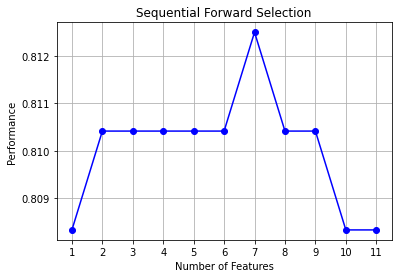

In [27]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs1.get_metric_dict(confidence_interval=0.95), kind='std_err')

plt.title('Sequential Forward Selection')
plt.grid()
plt.show()


# ploting graph 

In [28]:
# Lets access the indices of the best features directly via the k_feature_idx_ attribute:
sfs1.k_feature_names_, sfs1.k_feature_idx_

(('Gender',
  'Married',
  'Dependents',
  'Self_Employed',
  'CoapplicantIncome',
  'LoanAmount',
  'Credit_History'),
 (0, 1, 2, 4, 6, 7, 9))

In [29]:
df = pd.DataFrame.from_dict(sfs1.get_metric_dict()).T
df[["feature_idx","avg_score"]]

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,feature_idx,avg_score
1,"(9,)",0.808333
2,"(6, 9)",0.810417
3,"(0, 6, 9)",0.810417
4,"(0, 2, 6, 9)",0.810417
5,"(0, 1, 2, 6, 9)",0.810417
6,"(0, 1, 2, 4, 6, 9)",0.810417
7,"(0, 1, 2, 4, 6, 7, 9)",0.8125
8,"(0, 1, 2, 4, 6, 7, 8, 9)",0.810417
9,"(0, 1, 2, 3, 4, 6, 7, 8, 9)",0.810417
10,"(0, 1, 2, 3, 4, 6, 7, 8, 9, 10)",0.808333


Note : As we can see from above dataframe, index 7 have highest score and the selected feature indexs

## **Forward Feature Selection for Regression Problem**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

Selected Features : ('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')
Selected Features ID : (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)


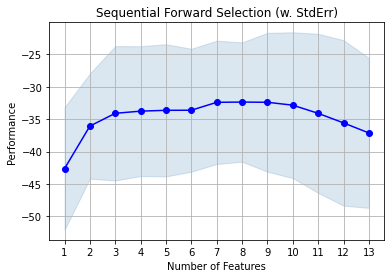

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

boston = load_boston()
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['Price'] = boston.target
X = bos.drop("Price", 1)       # feature matrix
y = bos['Price']               # target feature
lr = LinearRegression()
sfs = SFS(lr, 
          k_features=13,#'best', 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=5)
sfs = sfs.fit(X, y)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
print("Selected Features :", sfs.k_feature_names_)
print("Selected Features ID :", sfs.k_feature_idx_)
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [37]:
df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
df[["feature_idx","avg_score"]]

,feature_idx,avg_score
1,"(12,)",-42.6185
2,"(10, 12)",-36.0651
3,"(5, 10, 12)",-34.1001
4,"(3, 5, 10, 12)",-33.7681
5,"(0, 3, 5, 10, 12)",-33.6392
6,"(0, 3, 5, 7, 10, 12)",-33.6276
7,"(0, 2, 3, 5, 7, 10, 12)",-32.4082
8,"(0, 1, 2, 3, 5, 7, 10, 12)",-32.3697
9,"(0, 1, 2, 3, 5, 7, 10, 11, 12)",-32.4016
10,"(0, 1, 2, 3, 4, 5, 7, 10, 11, 12)",-32.8504


In [39]:
feat_names = list(sfs.k_feature_names_)
print(feat_names)

# printing selected features name

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [41]:
# creating a new dataframe using the above variables and adding the target variable
new_data = bos[feat_names]
new_data['Price'] = bos['Price'] 

# first five rows of the new data
new_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
